## OBJECTIVE
The company wants to know: <br>
• Which variables are significant in predicting the reason for hospitalization for different regions <br>
• How well some variables like viral load, smoking, Severity Level describe the hospitalization charges<br>

##### Assumption
- Severity level increase with increase in case's complexity.This implies, severity level 0 indicates less complicated case of patient and severity level 5 indicates high complexity of patient's case.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df_1 = pd.read_csv("scaler_apollo_hospitals.csv")
df = df_1.copy()
df.head(5)

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1338 non-null   int64  
 1   age                      1338 non-null   int64  
 2   sex                      1338 non-null   object 
 3   smoker                   1338 non-null   object 
 4   region                   1338 non-null   object 
 5   viral load               1338 non-null   float64
 6   severity level           1338 non-null   int64  
 7   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [4]:
df[df.duplicated()]

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges


### Structure and characterstic of data
- There are no null values are present in the dataset. 
-Only columns *'sex', 'smoker'* and *'region'* are categorical remaining columns have numerical data values.
- There are `1338` rows and `8` columns.
- There are NO duplicates present in the data.

### UNIVARIATE ANALYSIS

In [5]:
df.describe()

,Unnamed: 0,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,10.221233,1.094918,33176.058296
std,386.391641,14.049960,2.032796,1.205493,30275.029296
min,0.000000,18.000000,5.320000,0.000000,2805.000000
25%,334.250000,27.000000,8.762500,0.000000,11851.000000
50%,668.500000,39.000000,10.130000,1.000000,23455.000000
75%,1002.750000,51.000000,11.567500,2.000000,41599.500000
max,1337.000000,64.000000,17.710000,5.000000,159426.000000


In [6]:
def hist_and_box_plots(col, bins = 10):
    fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
    # hisplot
    sns.histplot(data = df,x =  col,bins = bins, kde = True, ax = axis[0])
    axis[0].set_title(f"Histplot for {col}")
    # boxplot
    sns.boxplot(data = df,x = col, ax = axis[1])
    axis[1].set_title(f"Boxplot for the {col}")
    

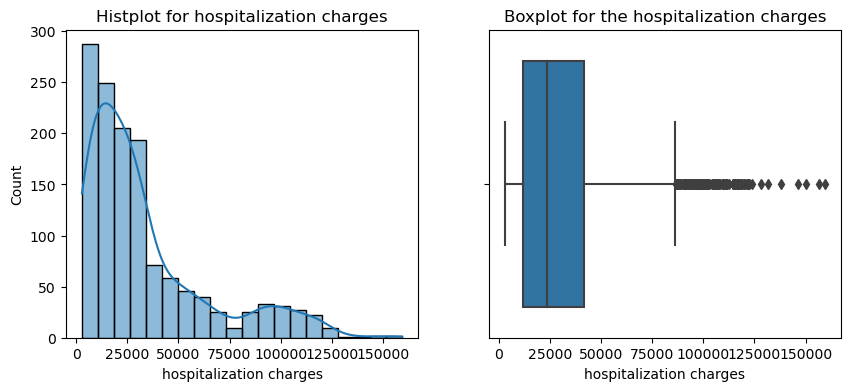

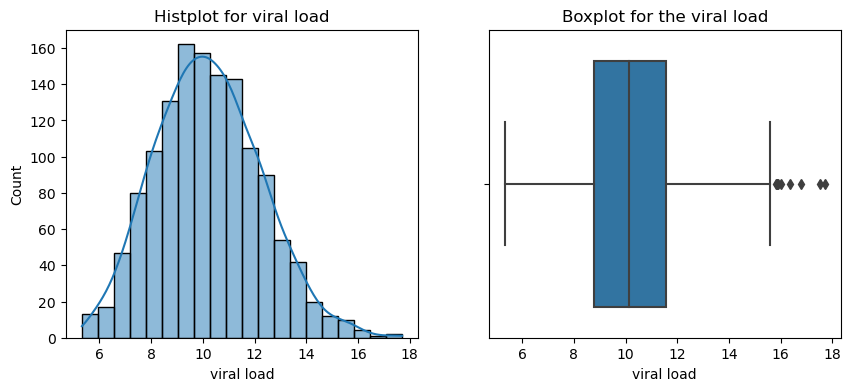

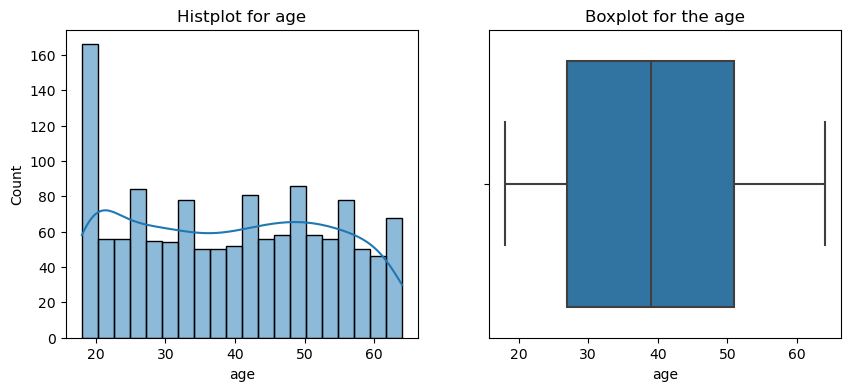

In [7]:
#HISPLOT For columns
number_col = ['hospitalization charges', 'viral load', 'age']
for col_name in number_col:
    hist_and_box_plots(col_name, bins = 20)

- *Mean*,*median*,*min* and *max* of **hospitalization** charges `33,176.058`, `23,455`,`2,805` and `1,59,426` respectively.
- *Mean*, *median*, *min* and *max* for **viral load** for the data are `10.221`, `10.13`, `5.32`, and `17.71` repectively.
- *Mean*, *median*, *min* and *max* for **age** for the data are `39.207`, `39.0`, `18`, and `64` years repectively.
- There are more outliers in **'hospitalization charges'**, followed by **'viral load'** and finally there are no outliers in **'age'** column.

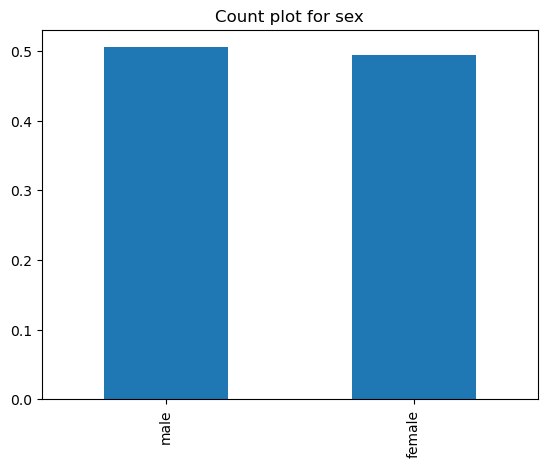

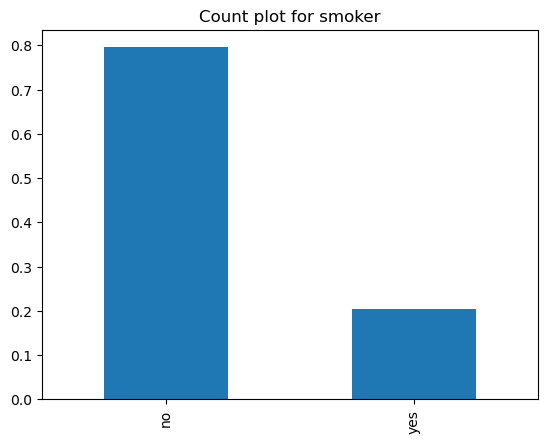

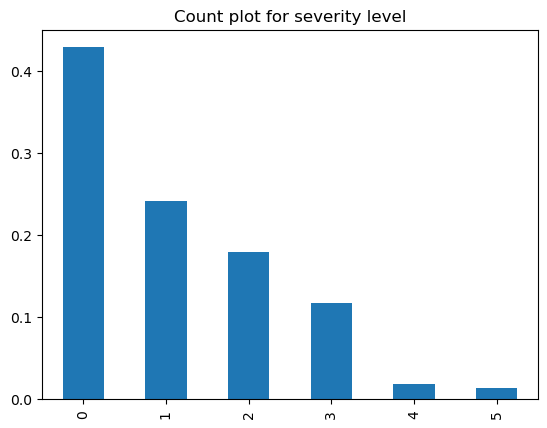

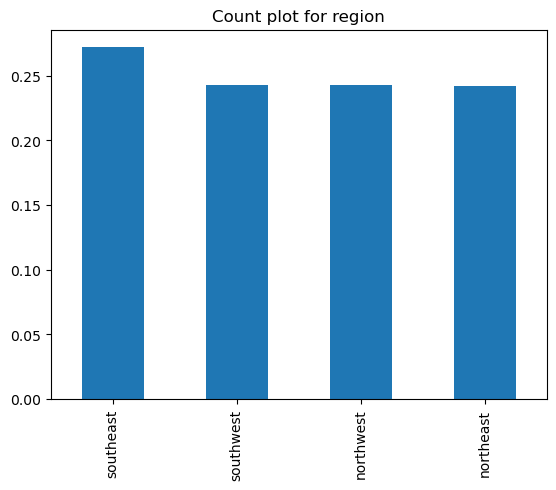

In [8]:
# COUNTPLOT For columns
count_columns = ['sex', 'smoker','severity level', 'region']
for col_name in count_columns:
#     fig = plt.figure(figsize = (6,3))
#     sns.countplot(data = df, x= col_name)
    df[col_name].value_counts(normalize = True).plot(kind ="bar")
    plt.title(f"Count plot for {col_name}")
    plt.show()

####### OBSERVATIONS
- Male and Female patient count is approximately equal.
- Around 80% of customers are non-smokers and 20% customers are smokers so it implies smoking is not causing the problem.
- *(Assuming that the severity of patient's case is propotional to the severity level)* Around 43% of the patients are very less severe. Also, the count of patient's case's severity decreases as the severity level increases.
- Number of patients are equal from all regions of Delhi except **Southeast** delhi, where the % of patients is slightly more  (i.e. slightly greater than 25%) as compare to other regions in Delhi (around 25%).

### BIVARIATE ANALYSIS

In [9]:
# df.groupby('sex')['hospitalization charges'].sum()

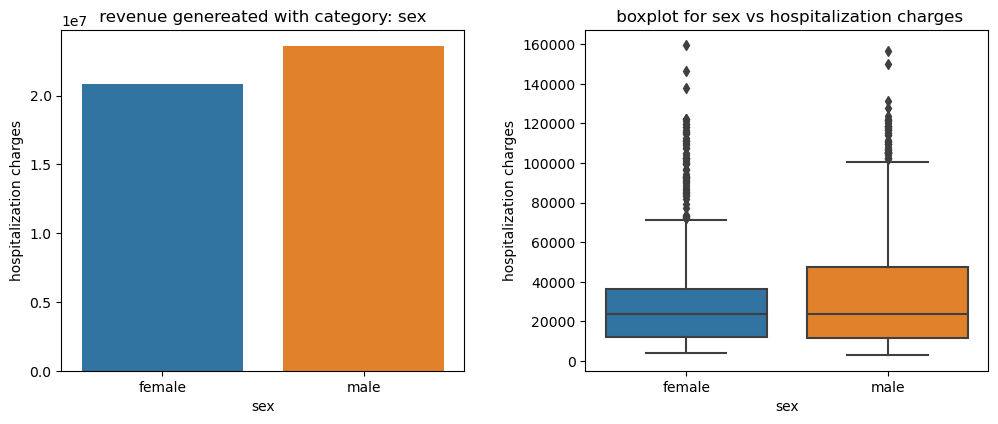

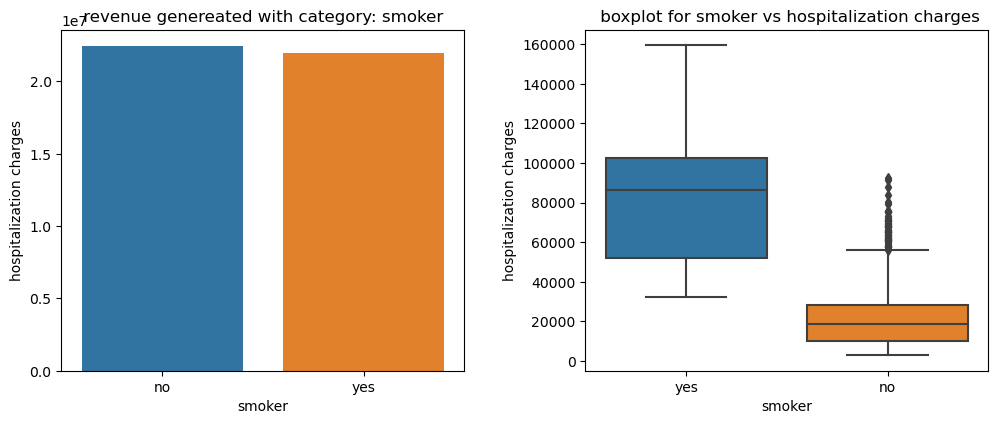

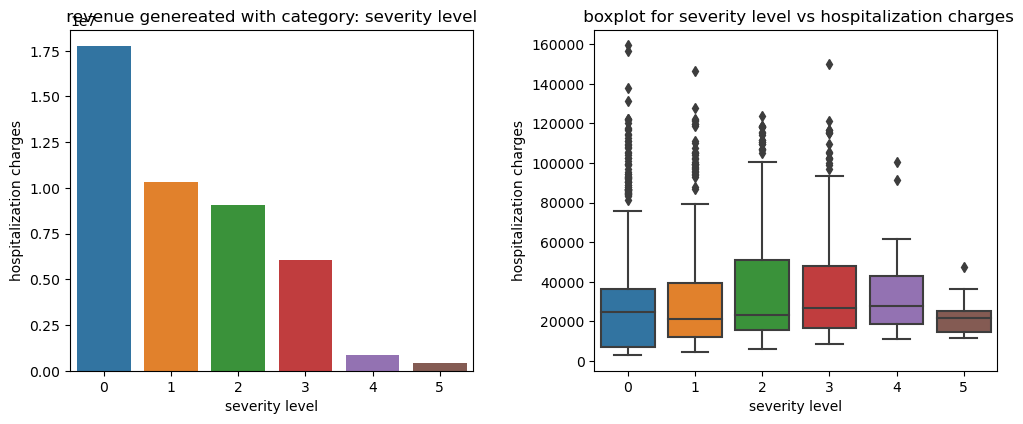

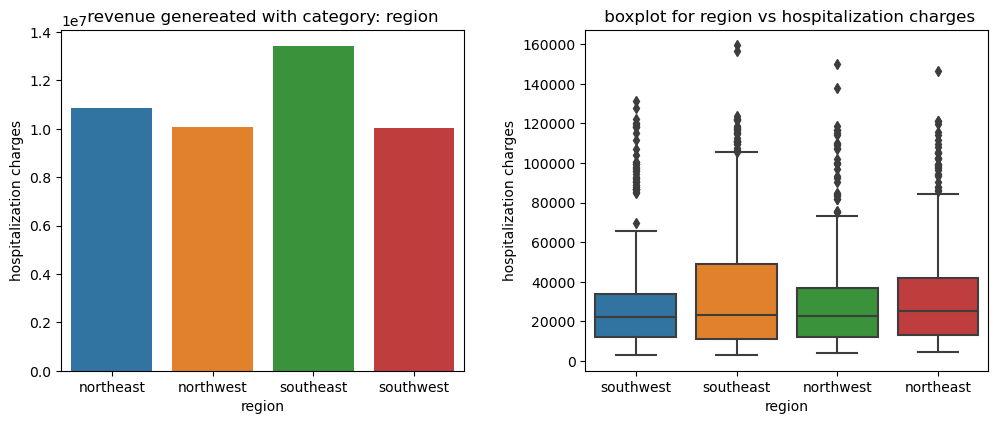

In [10]:
# HOSPITALIZATION CHARGES vs categor (gender, smoker, region, viral load, severity level)
columns_hospital = ['sex','smoker','severity level', 'region']

for col in columns_hospital:
    fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.3,hspace =0.6)
    df_new_grp = df.groupby(col)['hospitalization charges'].sum().reset_index()
    sns.barplot(x = col, y = "hospitalization charges", data = df_new_grp, ax = axis[0])
    axis[0].set_title(f" revenue genereated with category: {col} ")
    sns.boxplot(x = col, y = "hospitalization charges", data = df, ax = axis[1])
    axis[1].set_title(f" boxplot for {col} vs hospitalization charges")
    plt.show()

###### OBSERVATIONS
- Revenue generated from male patients (approx~ 23 million currency units) is more than that of female patients (approx~ 21 million currency units). Hospitalization chareges for both males and females are same.
- severity level 1 generates most of the revenue. The hospitalizaiton charges for all the regions of Delhi are almost same i.e. 20000 currency units.
- There is huge difference between the hopitalization charges between the smokers (median:80,000 currency units) and non-smokers (median: approx 20,000 currency units). The revenue generated by the hospital for smokers and non smokers is almost same.
- Highest revenue generating region for the hospital is DELHI:SOUTHEAST followed by DELHI: NORTHEAST. However median of the hospitalization charges are almost same (~20,000 currency units)

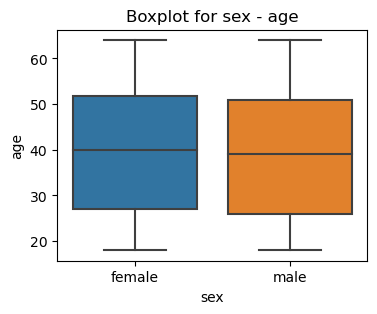

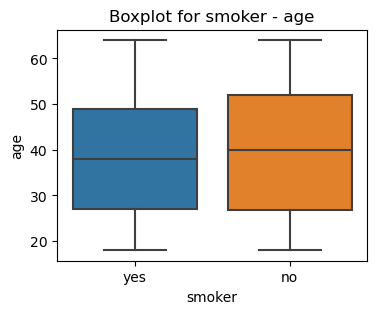

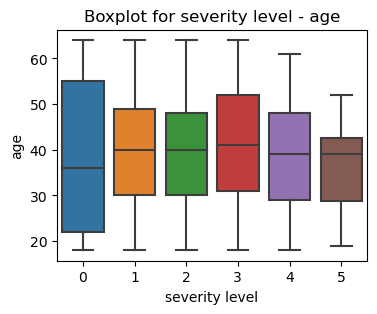

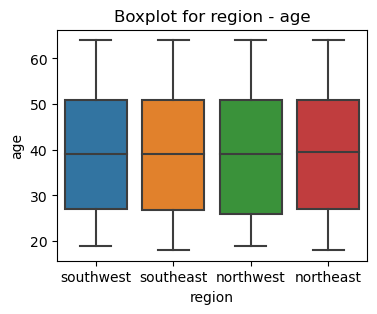

In [11]:
# AGE vs category (gender, smoker, region, viral load, severity level)
columns_hospital = ['sex','smoker','severity level', 'region']
for col in columns_hospital:
    plt.figure(figsize = (4,3))
    k = sns.boxplot(x = col, y = 'age', data = df)
    k.set_title(f"Boxplot for {col} - age")
    plt.show()
 

###### OBSERVATION
- The median age in both males and females is almost same i.e. ~40 years.
- Those who don't smoke visit hospitals have the median age of 40 years while those who smoke have the median age of 38 years.
- Around, 43% of the patients belonged to severity level 0 and age (median) of such patients is around 36 years, which is slightly lower than the median age of patient from other severity levels.
- In all the regions of DELHI, most of the patients are of age 40 (median) years.   

In [12]:
df.groupby('sex')['viral load'].median()

sex
female    10.035
male      10.230
Name: viral load, dtype: float64

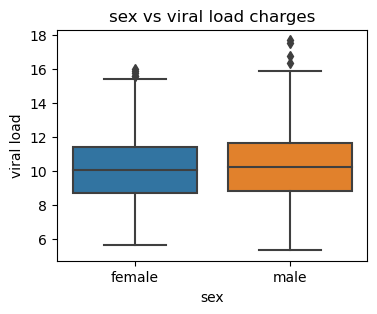

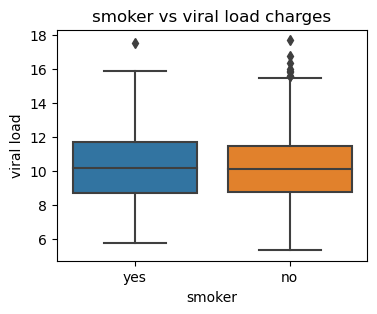

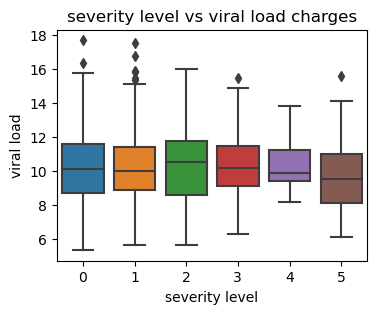

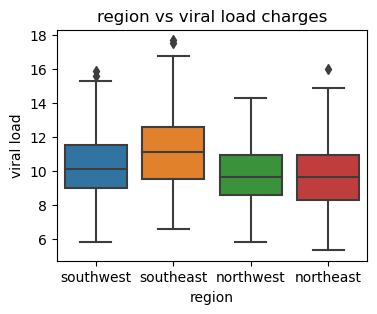

In [13]:
# VIRAL LOAD vs category (gender, smoker, region, viral load, severity level)
columns_hospital = ['sex','smoker','severity level', 'region']
for col in columns_hospital:
    plt.figure(figsize = (4,3))
    sns.boxplot(x = col, y = 'viral load', data = df)
    plt.title(f"{col} vs viral load charges")
    plt.show()

###### OBSERVATIONS
- Between males and females, viral load (median) is almost same in both the genders. However, there were more number of outliers in males than females. This suggests that in some patients more viral load was observed.
- Viral load among smokers and non smokers is also almost same i.e. around 10. In addition, there are patients who are non smokers but still got much high viral load (as shown by outliers).
- Viral load for all the severity cases is also ~ 10.
- In the southeast DELHI, slighlty more viral load (11.1) in the patients were observed as compared to the patients from other regions.

### CORRELATIONS

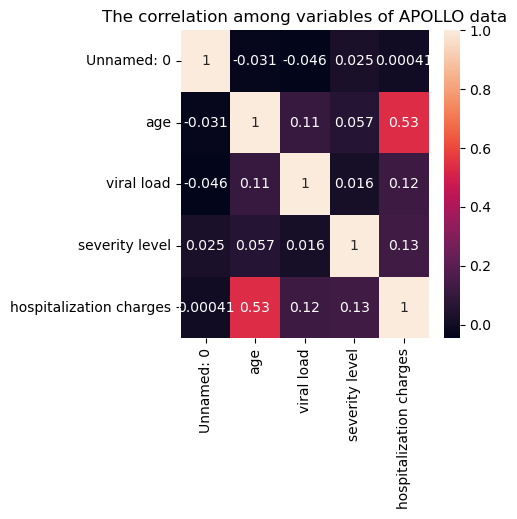

In [14]:
plt.figure(figsize = [4,4])
sns.heatmap(df.corr(method = "spearman"),annot = True)
plt.title("The correlation among variables of APOLLO data")
plt.savefig("./correlation among variables.jpg")

As per the above plot, age and hospitalization charges have significant positive correlation. Thus for hospitalization other than age, other columns (viral load, severity level) have insignificant correlation.

### OUTLIER DETECTION & TREATMENT

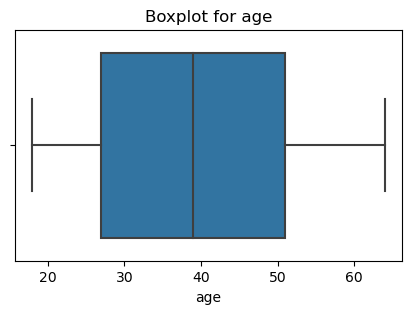

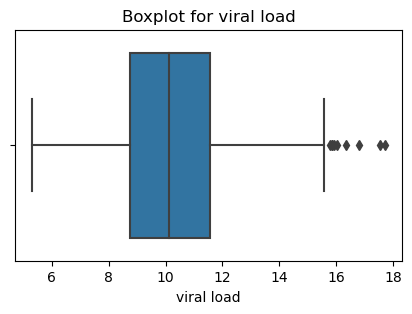

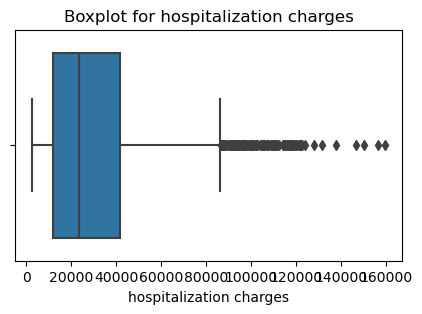

In [15]:
box_columns = ['age','viral load','hospitalization charges']
for col in box_columns:
    plt.figure(figsize = (5,3))
    sns.boxplot(data = df, x = col)
    plt.title(f"Boxplot for {col}")
    plt.show()

###### OBSERVATIONS
- NO outliers present in 'age',
- Less number of outliers present in 'viral load',
- Many outliers present in 'hospitalization charges'.

#### OUTLIER EXTRACTION using IQR

In [16]:
df2 = df.copy()

In [17]:
#  OUTLIERS for VIRAL LOAD
q1 = df2['viral load'].quantile(0.25)
q3 = df2['viral load'].quantile(0.75)
iqr = q3 - q1
df2 = df2[(df2['viral load'] <= q1 -(1.5*iqr)) |(df2['viral load'] >=q3 + (1.5*iqr))]
print("% of outliers in the given data for the 'viral load': ", 100*len(df2)/len(df))

% of outliers in the given data for the 'viral load':  0.672645739910314


There are only 0.67% outliers present in the column of 'viral load'. Since, number of outliers present is quite low, then we can ignore these outlier and leave them as such.

In [18]:
df2 = df.copy()
# for HOSPITALIZATION CHARGES
q1 = df2['hospitalization charges'].quantile(0.25)
q3 = df2['hospitalization charges'].quantile(0.75)
iqr = q3 - q1
df2 = df2[(df2['hospitalization charges'] <= q1 -(1.5*iqr)) |(df2['hospitalization charges'] >=q3 + (1.5*iqr))]
print("% of outliers in the given data for the 'viral load': ", 100*len(df2)/len(df))

% of outliers in the given data for the 'viral load':  10.388639760837071


There are 10.38% ouliers present in the column of 'hospitalization charges'.So, we'll remove them so that they won't influence our results. Hence for further calculations and analysis we'll be using dataset with **outliers removed**.

In [19]:
# dataframe with outliers removed
df3 = df[(df['hospitalization charges'] >= q1 - (1.5*iqr)) & 
         (df['hospitalization charges'] <= q3 +(1.5*iqr))]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1199 non-null   int64  
 1   age                      1199 non-null   int64  
 2   sex                      1199 non-null   object 
 3   smoker                   1199 non-null   object 
 4   region                   1199 non-null   object 
 5   viral load               1199 non-null   float64
 6   severity level           1199 non-null   int64  
 7   hospitalization charges  1199 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 84.3+ KB


#### Prove (or disprove) that the hospitalization charges of people who do smoking is greater than those who don't? 

###### Statistical Test
Since, we don't know about the population mean and standard deviation, we'll be using **t test of independence**. <br>
For this test there are three assumptions: <br>
- Whether two sample groups are independent or not,
- Normality check: whether data elements in respective groups follow any normal distribution,
- Homogenity check: The ratio in the variances of the two groups shouldn't be greater than 2.

In [20]:
df3.groupby('smoker')['hospitalization charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1061.0,20889.284637,14541.903769,2805.0,9955.0,18344.0,28383.0,83680.0
yes,138.0,55035.586957,13792.707698,32074.0,44784.5,52197.0,62048.5,86182.0


###### INDEPENDENCE of sample groups
To ensure that the two sample groups are independent to each other, we can do the sampling by allowing replacement. if we allow the sampling then the probablity of selection doesn't change because the population doesn't change. However, if we don't allow replacement during sampling then there is change in the population and hence the probablity changes. <br>
Alternatively, if the sample size is less than the 10% of the population then we call the groups to be independent even if we don't allow replacement during sampling.
As per the above execution we need to draw 138 sample from each group which is greater than 10% of the population (1338, sample provided to us) thus while sampling we'll allow replacement to ensure independence.

Text(0.5, 1.0, 'NOrmality check for smokers-hospitalization')

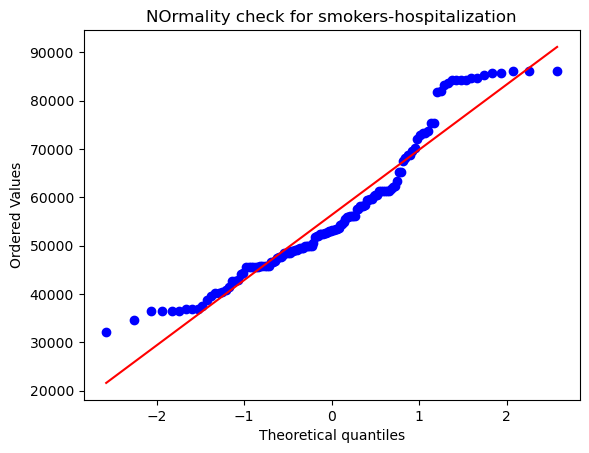

In [21]:
# NORMALITY CHECK for smokers
stats.probplot(df3.loc[df3['smoker'] == 'yes','hospitalization charges'].sample(138, replace = True), 
               dist = 'norm', plot = plt)
plt.title("NOrmality check for smokers-hospitalization")

In [22]:
## with KS Test
stats.kstest(df3.loc[df3['smoker'] == 'yes','hospitalization charges'].sample(138, replace =True),'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [23]:
### With Shapiro-wilk test
stats.shapiro(df3.loc[df3['smoker'] == 'yes','hospitalization charges'].sample(138, replace =True))

ShapiroResult(statistic=0.9385340809822083, pvalue=9.354873327538371e-06)

Text(0.5, 1.0, 'NOrmality check for non-smokers-hospitalization')

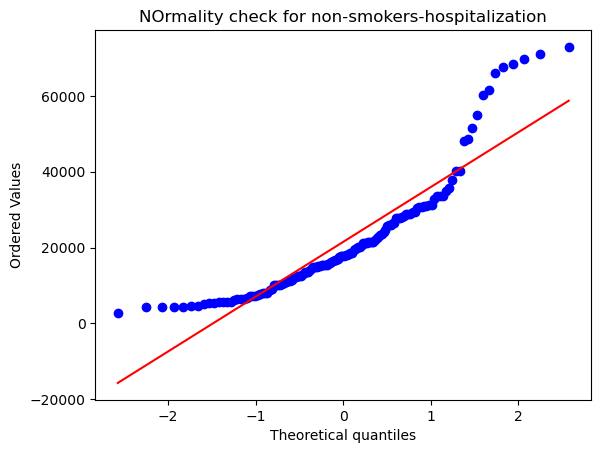

In [24]:
#NORMALITY CHECK for NON-smokers
stats.probplot(df3.loc[df3['smoker'] == 'no','hospitalization charges'].sample(138, replace = True),
               dist = 'norm', plot = plt)
plt.title("NOrmality check for non-smokers-hospitalization")

In [25]:
## with KS Test
stats.kstest(df3.loc[df3['smoker'] == 'no','hospitalization charges'].sample(138, replace =True),'norm')

KstestResult(statistic=1.0, pvalue=0.0)

for significance value  = 0.05, as per ks test we can say that group aren't normal,<br>
as per the QQ plot as well, neither of the groups look like normal as they aren't in a straight line.
Hence normality test failed.

In [26]:
### With Shapiro-wilk test
stats.shapiro(df3.loc[df3['smoker'] == 'no','hospitalization charges'].sample(138, replace =True))

ShapiroResult(statistic=0.8681772947311401, pvalue=9.751135454649784e-10)

In [27]:
# CHECK FOR HOMOGENITY
# df.groupby('smoker')[['hospitalization charges']].std()
k = df3.sample(138, replace = True)
k.groupby('smoker')[['hospitalization charges']].std()

,hospitalization charges
smoker,
no,14130.339640
yes,10434.832878


In [28]:
# ratio  = max/min
ratio_t = 15471.0939/14353.46
ratio_t

1.0778651210230843

In [29]:
# Check for variance by leven's test
group1 = df3.loc[df3['smoker'] == 'no','hospitalization charges'].sample(138, replace =True)
group2 = df3.loc[df3['smoker'] == 'yes','hospitalization charges'].sample(138, replace =True)
statistic_value, p_value = stats.levene(group1, group2)
if p_value > 0.05:
    print("Homogenity test PASSED, the two sample groups have equal variance")
else:
    print("Homogenity test FAILED, the two sample groups have UN-equal variance")

Homogenity test FAILED, the two sample groups have UN-equal variance


Since this ration is less than 2, Thus we can call these group as homogeous.
Passed test for homogenity . <br>

As for the assumption:<br>
- sample groups are normal (False)
- sample groups are homogeous (True)
- sample groups are independent (True)

Since one out of three assumptions for t test failed. we can say that results achieved from applying the test won't be valid or too reliable.

###### Hypothesis Formation & significance value (α)
H0: Mean of hospitalization charges for smoker = mean of hospitalization charges for non-smokers <br>
Ha: Mean of hospitalization charges for smoker > mean of hospitalization charges for non-smokers
setting α = 0.05.

In [30]:
hospitalization_of_smokers = df3.loc[df3['smoker'] == "yes",'hospitalization charges'].sample(138)
hospitalization_of_non_smokers= df3.loc[df3['smoker'] == "no", 'hospitalization charges'].sample(138)

In [31]:
stats.ttest_ind(a = hospitalization_of_smokers, b = hospitalization_of_non_smokers, 
                alternative = "greater",equal_var = True)

Ttest_indResult(statistic=18.663059708751003, pvalue=5.0043470544383834e-51)

As the p-value is very less achieved is very less than 0.05 (α) thus we'll be rejecting our null hypothesis. This also proves that our alternate hypothesis so assumed can be considered true. That is 
hospitalization charges of non-smokers are  less than that of smokers.<br>
The same can also be OBSERVED with the following boxplot:

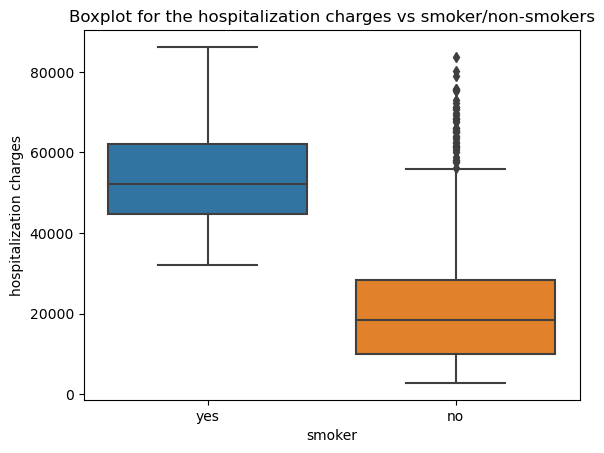

In [32]:
sns.boxplot(data =df3, x = "smoker", y = 'hospitalization charges')
plt.title("Boxplot for the hospitalization charges vs smoker/non-smokers")
plt.savefig("./Boxplot hospitalization charges vs smoker & non-smokers.jpg")

### Prove (or disprove) with statistical evidence that the **viral load of females** is **different** from that of **males**

###### Statistical test
To answer this question, we need to check if the two sample groups have their mean equal or not. And for that we can use t test. Also, we don't know about the population mean and standard deviation, we'll be using **t test of independence**. <br>

###### Assuumption  for t test

For this test there are three assumptions: <br>
- Whether two sample groups are independent or not,
- Normality check: whether data elements in respective groups follow any normal distribution,
- Homogenity check: The ratio in the variances of the two groups shouldn't be greater than 2.

In [33]:
df3.groupby('sex')['viral load'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,612.0,9.978186,1.981809,5.60,8.595,9.86,11.1875,16.02
male,587.0,10.087700,2.026193,5.32,8.610,9.94,11.3550,17.71


###### Sampling
The min size of sample that we can take from each group is of 587 because our sample must be of equal sizes. 

###### INDEPENDENCE of sample groups
To ensure that the two sample groups are independent to each other, we can do the sampling by allowing replacement. if we allow the sampling then the probablity of selection doesn't change because the population doesn't change. However, if we don't allow replacement during sampling then there is change in the population and hence the probablity changes. <br>
Alternatively, if the sample size is less than the 10% of the population then we call the groups to be independent even if we don't allow replacement during sampling.<br>
As per the above execution we need to draw 138 sample from each group which is greater than 10% of the population (1338, sample provided to us) thus while sampling we'll allow replacement to ensure independence.

Text(0.5, 1.0, 'QQ plot: viral load of female')

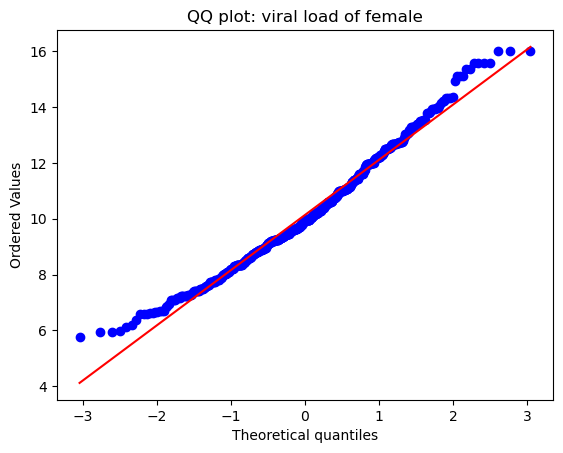

In [34]:
# # Normality check for FEMALE sample group
stats.probplot(df3.loc[df3['sex'] == "female", 'viral load'].sample(587, replace = True), 
               plot = plt, dist ='norm' )
plt.title('QQ plot: viral load of female')

In [35]:
stats.kstest(df3.loc[df3['sex'] == 'female','viral load'].sample(587, replace = True),'norm')

KstestResult(statistic=0.9999999892824097, pvalue=0.0)

In [36]:
# with shapiro wilk test
stats.shapiro(df3.loc[df3['sex'] == 'female','viral load'].sample(587, replace = True))

ShapiroResult(statistic=0.9868192672729492, pvalue=3.80753081117291e-05)

Text(0.5, 1.0, 'QQ plot: viral load for male')

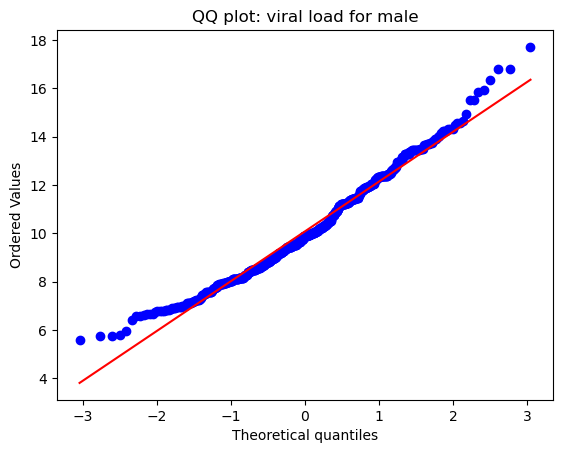

In [37]:
# Normality check for MALE sample group
stats.probplot(df3.loc[df3['sex'] == 'male','viral load'].sample(587,replace =True), 
               plot = plt, dist = 'norm')
plt.title("QQ plot: viral load for male")

In [38]:
stats.kstest(df3.loc[df3['sex'] == 'male','viral load'].sample(587, replace = True), 'norm')

KstestResult(statistic=0.9999999481163739, pvalue=0.0)

In [39]:
# with shapiro wilk test
stats.shapiro(df3.loc[df3['sex'] == 'male','viral load'].sample(587, replace = True))

ShapiroResult(statistic=0.9897140860557556, pvalue=0.0003956411383114755)

Therefore, normality test failed. The two sample groups involved are not normally distributed.

In [40]:
#HOMOGENITY CHECK of the two sample groups
# df3.groupby('sex')[['viral load']].std()
k = df3.sample(138, replace = True)
k.groupby('sex')[['viral load']].std()

,viral load
sex,
female,1.924345
male,2.424111


In [41]:
###### Homogenity check with levene test
group1 = df3.loc[df3['sex'] == 'male','viral load'].sample(587, replace =True)
group2 = df3.loc[df3['sex'] == 'female','viral load'].sample(587, replace =True)
statistic_value,p_value = stats.levene(group1, group2)
if p_value > 0.05:
    print("homogenity check PASSED!")
else:
    print("homogenity check FAILED!")

homogenity check PASSED!


Homogenity test passed. <br>
<br>
Hence we can say that one out of three test failed. Hence the conclusions drawn from t test won't reliable much.

###### HYPOTHESIS FORMATION
H0 : viral load of females = viral load of males
Ha : viral load of females != viral load of females
setting **significance value (α)** = 0.05 

In [42]:
viral_load_females = df3.loc[df3['sex'] == "female",'viral load'].sample(587, replace = True)
viral_load_males= df3.loc[df3['sex'] == "male", 'viral load'].sample(587, replace = True)

In [43]:
stats.ttest_ind(viral_load_females,viral_load_males, equal_var = True)

Ttest_indResult(statistic=-0.5153686889994175, pvalue=0.6063926010043288)

Since, significance value (α) < 0.525 . Fail to reject the null hypothesis. That is, viral load of females is equal to that of  males.<br>
The same can also be proved by plotting the given data (with outliers removed).

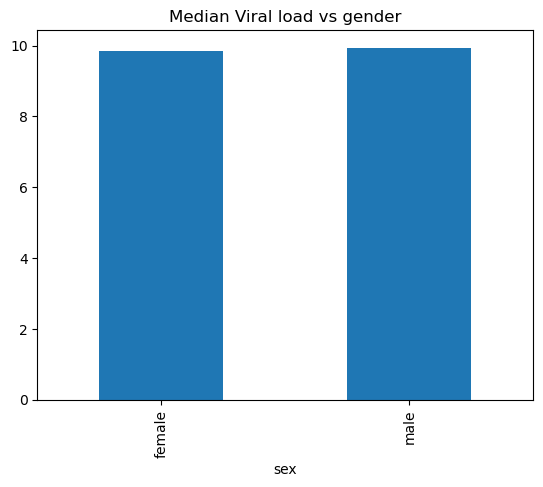

In [44]:
df3.groupby('sex')['viral load'].median().plot(kind = "bar")
plt.title("Median Viral load vs gender")
plt.savefig("./Median Viral load vs gender.jpg")

### Is the proportion of smoking significantly different across different regions? 

###### Statistical Test
Since the columns columns 'smoker' and 'regions' are categorical and we want to know if they are significantly different or not, then we'll use CHI SQUARE TEST.

###### Assumption of the χ2 (chi square)  test
- **Both** the variables need to be **categorical**,
- Every observation in the data is **independent**,
- Cells in the contingency table are **mutually exclusive**,
- **Expected values** of cells should be *5 or greater* in *at least 80%* of cells. <br>
<br>
It is given that both the variables given in the data are **categorical** variables.
<br>
To verify second assumption, each patient included in this dataset were surveyed independently of every other patient.
<br>
Since, two region can't occur at the same time for a patient, thus cells in contingency tables are **mutually exclusive**.

In [45]:
df.columns

Index(['Unnamed: 0', 'age', 'sex', 'smoker', 'region', 'viral load',
       'severity level', 'hospitalization charges'],
      dtype='object')

In [46]:
df3.groupby(['smoker'])['region'].value_counts(normalize = True)

smoker  region   
no      southeast    0.256362
        northwest    0.251649
        southwest    0.249764
        northeast    0.242224
yes     northeast    0.282609
        northwest    0.275362
        southeast    0.253623
        southwest    0.188406
Name: region, dtype: float64

In [47]:
pd.crosstab(df3['smoker'], df3['region'])

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,272,265
yes,39,38,35,26


In [48]:
k = pd.crosstab(df3['smoker'], df3['region'])
n = np.array(k.iloc[0,:]).reshape(4,)
y = np.array(k.iloc[1,:]).reshape(4,)
n,y

(array([257, 267, 272, 265], dtype=int64),
 array([39, 38, 35, 26], dtype=int64))

<AxesSubplot:xlabel='smoker'>

<Figure size 600x400 with 0 Axes>

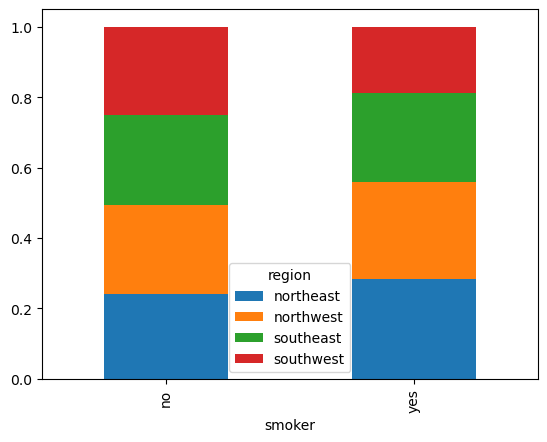

In [49]:
plt.figure(figsize = (6,4))
pd.crosstab(df3['smoker'],df3['region'],normalize = "index").plot(kind = 'bar', stacked  = True)


##### HYPOTHESIS FORMATION
H0: There is no relationship between smokers and region
Ha: There is relationship between smokers and regions
setting significance value (α) = 0.05

In [50]:
chi_square_score, p_value, dof, expected = stats.chi2_contingency([n,y])
p_value

0.3955637450555718

This value 0.3955 > 0.05 (α,significance value) With this we 'fail to reject null hypothesis'.With this we can say that there is no relationship between category 'region' and 'smoker'.

###  Is the mean **viral load for women** with `0` *Severity level* , `1` *Severity level*, and `2` *Severity level* the same? Explain your answer with statistical evidence (One way Anova)

###### Statistical Test
To find if there is a relationship of a column in one or more categories present within a column, then we can use F- test or ANOVA.<br>
<br>
###### Assumptions
- Samples are random and independent,
- Samples for each group is normally distributed,
- Homogeneity of variances among different groups.

###### Random and independent
randomly selected sample will be independent if we allow replacement while sampling.

In [51]:
m = df3.groupby(['sex','severity level'])[['viral load']].count()
m


viral load
sex    severity level            
female 0                      269
       1                      147
       2                      107
       3                       71
       4                       10
       5                        8
male   0                      253
       1                      145
       2                       99
       3                       67
       4                       13
       5                       10

In [52]:
df3.loc[df3['sex'] == "female",['severity level','viral load']]

,severity level,viral load
0,0,9.30
5,0,8.58
6,1,11.15
7,3,9.25
9,0,8.61
...,...,...
1332,3,14.90
1334,0,10.64
1335,0,12.28
1336,0,8.60


Text(0.5, 1.0, 'QQ plot: severity level: 0 for female')

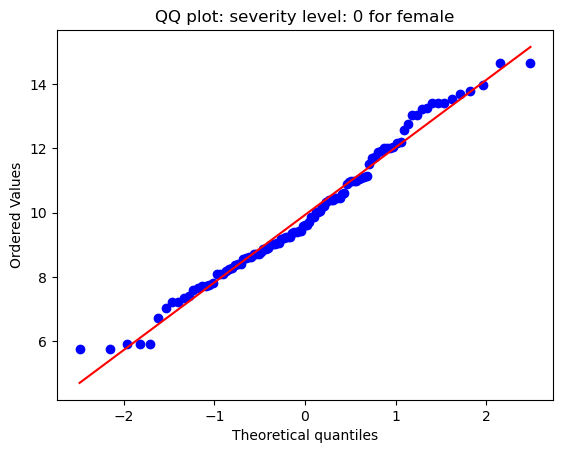

In [53]:
###### NORMALITY CHECK for severity level  = 0
stats.probplot(df3.loc[(df3['sex'] == 'female') & (df3['severity level'] == 0),'viral load'].sample(
    107, replace = True), plot = plt, dist = 'norm')
plt.title("QQ plot: severity level: 0 for female")

In [54]:
# with KS TEST for severity level 0
stats.kstest(df3.loc[(df3['severity level'] == 0) &(df3['sex'] == 'female'),
                     'viral load'].sample(107, replace = True),"norm")

KstestResult(statistic=0.9999999957943032, pvalue=0.0)

In [55]:
# with shapiro wilk test for severity level 0
stats.shapiro(df3.loc[(df3['severity level'] == 0) &(df3['sex'] == 'female'),
                     'viral load'].sample(107, replace = True))

ShapiroResult(statistic=0.9705743193626404, pvalue=0.01775316521525383)

Other than Shapiro wilk test all the above test concluded that the sample is not normally distributed.
we'll be taking the result of shapiro wilk test into consideration will consider the sample group to be normally distributed.

Text(0.5, 1.0, 'QQ plot: Viral load women severity leve = 1')

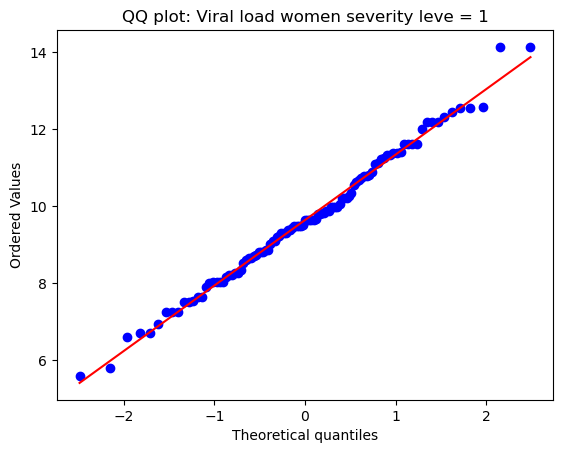

In [56]:
###### NORMALITY CHECK for severity level  = 1
stats.probplot(df3.loc[(df3['severity level'] == 1) &(df3['sex'] == 'female'),
                       'viral load'].sample(107, replace = True), plot = plt, dist = 'norm')
plt.title("QQ plot: Viral load women severity leve = 1")

In [57]:
#  NORMALITY CHECK with KS TEST
stats.kstest(df3.loc[(df3['severity level'] == 1) &(df3['sex'] == 'female'),
                     'viral load'].sample(107, replace = True),"norm")

KstestResult(statistic=0.9999999999794421, pvalue=0.0)

In [58]:
# with shapiro wilk test
stats.shapiro(df3.loc[(df3['severity level'] == 1) &(df3['sex'] == 'female'),
                     'viral load'].sample(107, replace = True))

ShapiroResult(statistic=0.9784968495368958, pvalue=0.08014027029275894)

For the severity level 1 as well,
Other than Shapiro wilk test all the above test concluded that the sample is not normally distributed.
we'll be taking the result of shapiro wilk test into consideration will consider the sample group to be normally distributed.

Text(0.5, 1.0, 'QQ plot: Viral load women severity level = 2')

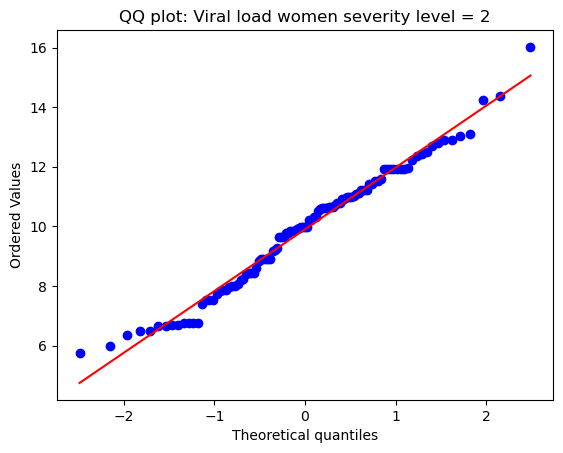

In [59]:
stats.probplot(df3.loc[(df3['severity level'] == 2) &(df3['sex'] == 'female'),
                       'viral load'].sample(107,replace = True), plot = plt, 
               dist = 'norm')
plt.title("QQ plot: Viral load women severity level = 2")

In [60]:
stats.kstest(df3.loc[(df3['severity level'] == 2) &(df3['sex'] == 'female'),
                     'viral load'].sample(107,replace = True),"norm")

KstestResult(statistic=0.9999999949784683, pvalue=0.0)

In [61]:
# with shapiro wilk test
stats.shapiro(df3.loc[(df3['severity level'] == 2) &(df3['sex'] == 'female'),
                     'viral load'].sample(107, replace = True))

ShapiroResult(statistic=0.9851783514022827, pvalue=0.28244349360466003)

For the severity level 1 as well,
Other than Shapiro wilk test all the above test concluded that the sample is not normally distributed.
we'll be taking the result of shapiro wilk test into consideration will consider the sample group to be normally distributed.

In [62]:
l = pd.DataFrame(df3.loc[(df['sex'] == 'female') &
    ((df3['severity level'] == 0)|(df3['severity level'] == 1)|(df3['severity level'] == 2)),
                         ['severity level','viral load']].sample(107, replace = True))
l.head()

,severity level,viral load
160,0,8.87
1282,0,7.22
1190,2,10.92
1334,0,10.64
792,0,7.73


In [63]:
###### HOMOEGENITY OF VARIANCES
k = l.groupby('severity level')[['viral load']].std()
k

,viral load
severity level,
0,1.975930
1,2.323266
2,1.668353


In [64]:
ratio = k.max()/k.min()
if ratio[0] < 2:
    print("variance are equal and homogenity PASSED")
else:
    print("variance are NOT equal and homogenity FAILED")

variance are equal and homogenity PASSED


In [65]:
###### Homogenity check with levene test
group1 = df3.loc[(df['sex'] == 'female')&(df3['severity level'] == 0),'viral load'
                ].sample(107, replace =True)
group2 = df3.loc[(df3['sex'] == 'female') & (df3['severity level'] == 1),'viral load'
                ].sample(107, replace =True)
group3 = df3.loc[(df3['sex'] == 'female') & (df3['severity level'] == 2),'viral load'
                ].sample(107, replace =True)
statistic_value,p_value = stats.levene(group1, group2, group3)
if p_value > 0.05:
    print("homogenity check PASSED!")
else:
    print("homogenity check FAILED!")

homogenity check PASSED!


##### HYPOTHESIS FORMATION
H0: mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the **same** <br>
Ha: mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the SIGNIFICANTLY **different** <br>
setting α (significance value)  = 0.05

In [66]:
severity_level_0 = df3.loc[(df3['sex'] == 'female') & (df3['severity level'] == 0),'viral load'].sample(107, replace = True).values
severity_level_1 = df3.loc[(df3['sex'] == 'female') & (df3['severity level'] == 1), 'viral load'].sample(107, replace = True).values
severity_level_2 = df3.loc[(df3['sex'] == 'female') & (df3['severity level'] == 2), 'viral load'].sample(107, replace = True).values

In [67]:
stats.f_oneway(severity_level_0, severity_level_1, severity_level_2)

F_onewayResult(statistic=0.3938220511815332, pvalue=0.6748025615042871)

Since, the p value > 0.05 (α), hence **fail to reject the null hypothesis**. This implies that the viral load of women with severity level 1,2, 3 have the equal viral load. <br>


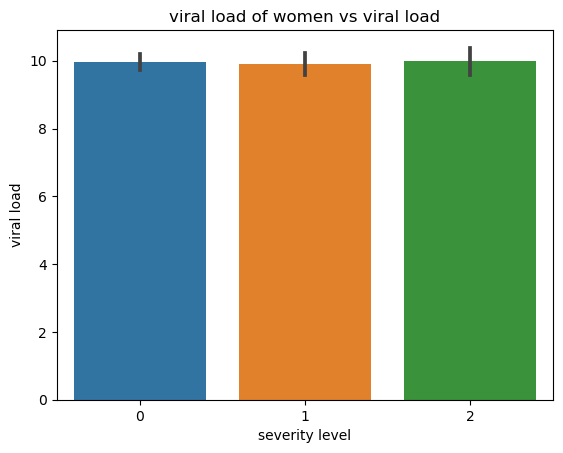

In [68]:
j = df3.loc[(df['sex'] == "female") & ((df['severity level'] == 0) | (df['severity level'] == 1)
                                   | (df['severity level'] == 2) ),['severity level','viral load']]
sns.barplot(data = j, x = 'severity level', y = 'viral load')
plt.title("viral load of women vs viral load")
plt.savefig("./viral load of women vs viral load.jpg")

The same can also be observed in the visualization above. However it should be noted that the samples do not have exactly equal viral load, but very close a single value of 10.

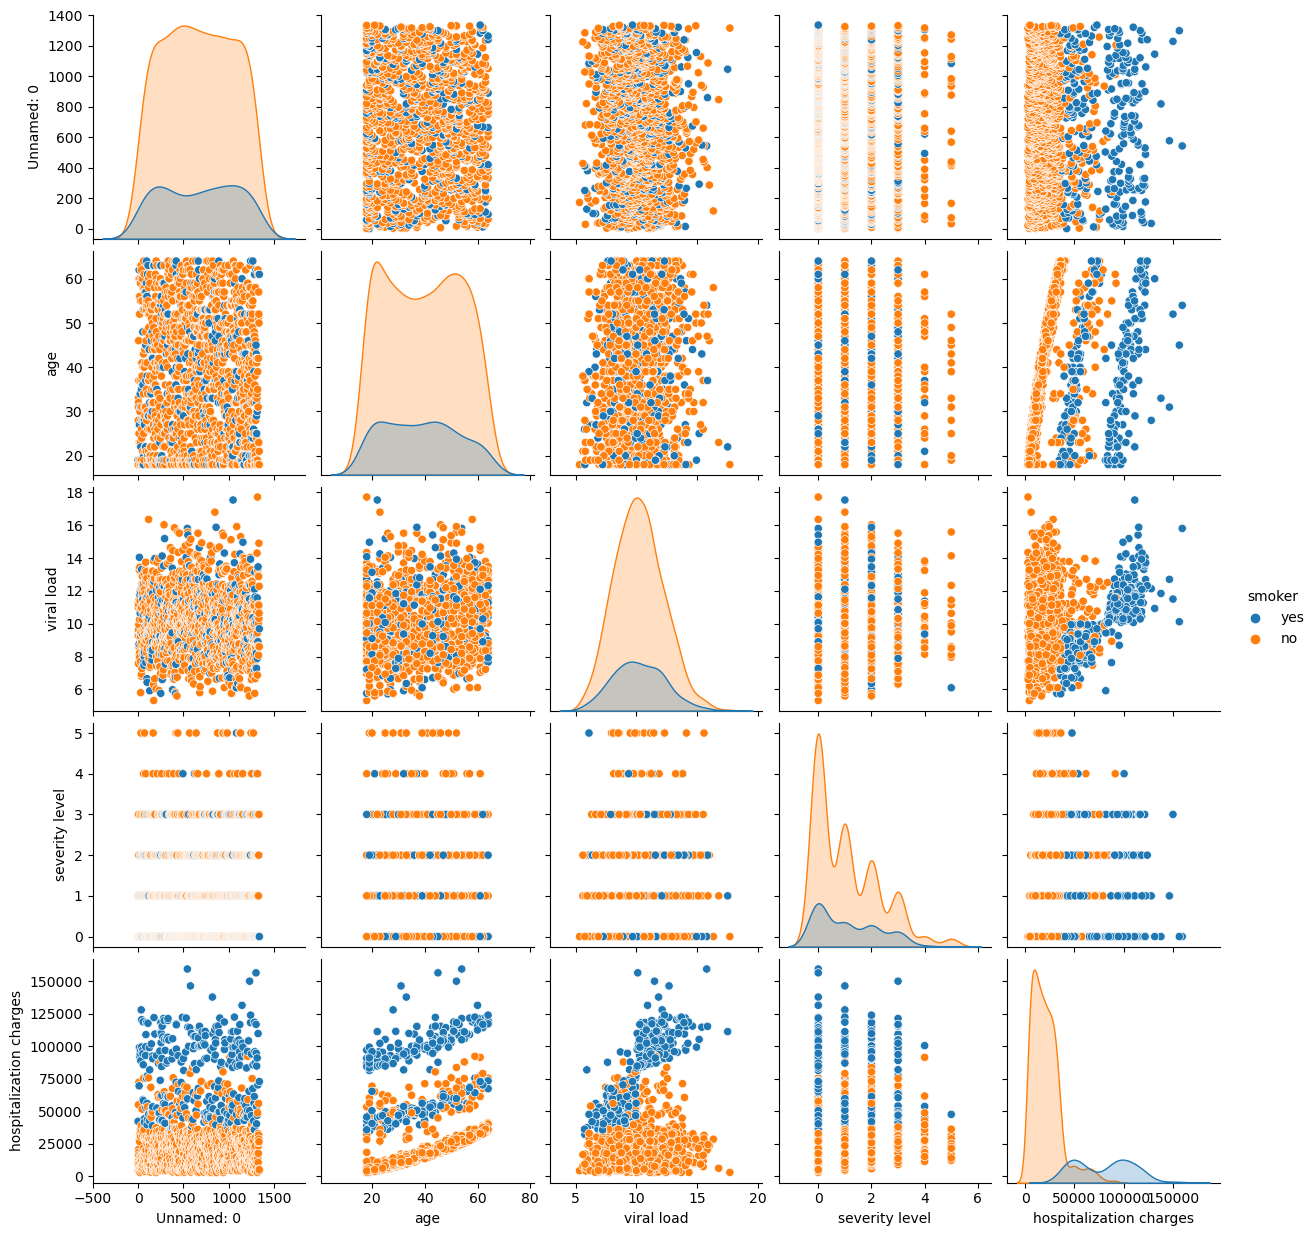

In [69]:
sns.pairplot(data = df, hue = 'smoker')
plt.savefig('./pairplot with hue SMOKER.jpg')

From all the plots it is clear that the hospitalization charges for smokers is greater than that of non-smokers.

###### How well some variables like viral load, smoking, Severity Level describe the hospitalization charges
Age and hospitalization charges have is positive correlation (as compare to other variables like viral load,severity level is very small). <br>
If the patient is smoker then hospitalization charges will be more than that of non-smoker as it is also proved above with Hypothesis testing. <br>
No relation of columns 'viral load', 'severity level' with hospitalization charges were observed.

In [70]:
df['severity level'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: severity level, dtype: int64

In [71]:
df.loc[df['severity level'] == 0].groupby('sex').count()

,Unnamed: 0,age,smoker,region,viral load,severity level,hospitalization charges
sex,,,,,,,
female,289,289,289,289,289,289,289
male,285,285,285,285,285,285,285


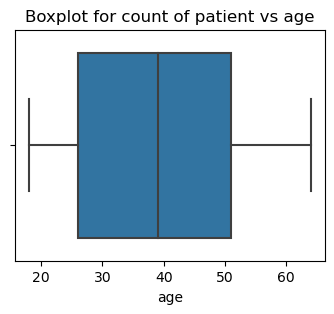

In [72]:
plt.figure(figsize = (4,3))
sns.boxplot(data = df3, x = 'age')
plt.title("Boxplot for count of patient vs age")
plt.savefig("./Boxplot for count of patient vs age.jpg")


###### Which variables are significant in predicting the reason for hospitalization for different regions
All per the observation of above data, there are chances that the patients are suffering from COVID like infections. The reasons: <br>
- All the regions of delhi have equal proportion of patients
- Male and female patients are also equal in number,
- Number of non-smoker > smoker patients, this implies that smoking is not the cause for hospitalization  of patients
- viral load in males and females is almost same.
- Majority of the patients are for severity level 0, followed by severity level 1  and so on. Very less patients reached the severity level 4 and 5. And as per above data patient with severity level 0 have equal almost equal number of males and females .This indicates that the **spread** of the infection is high.